In [1]:
import numpy as np
import numpy.ma as ma
import copy
from operator import or_
from statistics import median, mean
np.random.seed(0)

import sys
sys.path.append("..")
import utils as ut
import distance_correlation as dc
import STMF as tmf  # sparse tropical matrix factorization

In [2]:
def scaled_ninf(NINF):
    corrs, approx_tmf, approximations, factor_matrices  = [], [], [], []
    X_t, left_matrix, right_matrix = ut.scale_matrix(X_original, NINF)
    print("scaled matrix, minimum: " + str(np.min(X_t)) + ", maximum: " + str(np.max(X_t)))
    for i in range(0, repeat):
        model_tmf = tmf.STMF(rank=rank, max_iter=max_iter, initialization='random_vcol')
        model_tmf.fit(X_t)
        approx_tmf = model_tmf.predict_all()
        model_tmf.U, model_tmf.V = ut.inverse_scaling(model_tmf.U, model_tmf.V, left_matrix, right_matrix)
        approx_tmf = model_tmf.predict_all()
        correlation_tmf, a, b = dc.dcor(X_original, approx_tmf)
        corrs.append(correlation_tmf)
        approximations.append(approx_tmf)
        factor_matrices.append((model_tmf.U, model_tmf.V))
    index = np.argmax(corrs)
    max_approx = approximations[index]
    fac_mat = factor_matrices[index]
    return mean(corrs), median(corrs), max(corrs), max_approx, fac_mat

def mean_median(mean, median, best):
    #print("mean: " + str(round(mean,3)) + ", median: " + str(round(median,3)) + ", best: " + str(round(best,3)))
    print("mean: " + str(mean) + ", median: " + str(median) + ", best: " + str(best))
    
    
def tmf_initialization(init):
    corrs, approx_tmf, approximations, factor_matrices = [], [], [], []
    for i in range(0, repeat):
        model_tmf = tmf.STMF(rank=rank, max_iter=max_iter, initialization=init)
        model_tmf.fit(X_original)
        approx_tmf = model_tmf.predict_all()
        correlation_tmf, a, b = dc.dcor(X_original, approx_tmf)
        corrs.append(correlation_tmf)
        approximations.append(approx_tmf)
        factor_matrices.append((model_tmf.U, model_tmf.V))
    index = np.argmax(corrs)
    max_approx = approximations[index]
    fac_mat = factor_matrices[index]
    return mean(corrs), median(corrs), max(corrs), max_approx, fac_mat

## Max-plus matrix

In [3]:
m = 200  # number of rows
n = 100  # number of columns
rank = 2  # rank 
A = ma.masked_array(np.random.rand(m, rank), mask=np.zeros((m, rank))) # uniform distribution over [0, 1).
B = ma.masked_array(np.random.rand(n, rank), mask=np.zeros((n, rank)))
X_original = ut.max_plus(A, B.T)
X_original, _, _ = ut.cluster_matrix(X_original)
rank = 2
max_iter = 300
repeat = 10

In [4]:
minX = np.min(X_original)
minX

0.12719392971282184

In [5]:
maxX = np.max(X_original)
maxX

1.99680925789654

## Original matrix with random Acol, col_min and col_max initialization

mean: 0.9701216422453495, median: 0.9741244557516426, best: 0.9928241454466251


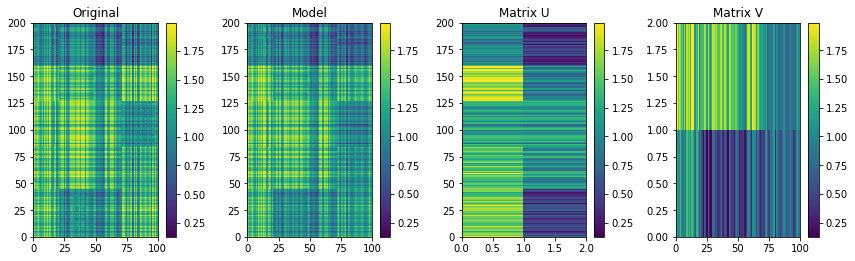

In [6]:
res_vcol = tmf_initialization(init='random_vcol')
mean_median(res_vcol[0], res_vcol[1], res_vcol[2])
ut.plot_original_model_U_V(X_original, res_vcol[3], res_vcol[4][0], res_vcol[4][1])

mean: 0.9790250875688172, median: 0.9793722271143461, best: 0.9958320814430235


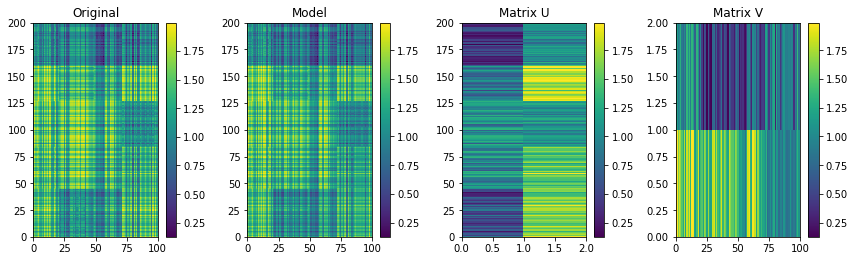

In [7]:
res_colmin = tmf_initialization(init='col_min')
mean_median(res_colmin[0], res_colmin[1], res_colmin[2])
ut.plot_original_model_U_V(X_original, res_colmin[3], res_colmin[4][0], res_colmin[4][1])

mean: 0.9690034822262747, median: 0.9792571594981483, best: 0.9933394650968097


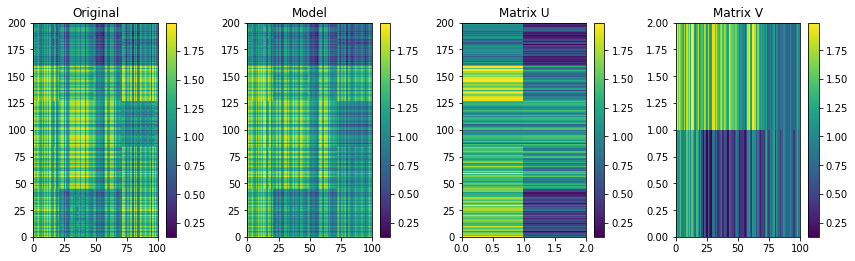

In [8]:
res_colmax = tmf_initialization(init='col_max')
mean_median(res_colmax[0], res_colmax[1], res_colmax[2])
ut.plot_original_model_U_V(X_original, res_colmax[3], res_colmax[4][0], res_colmax[4][1])

## Scaled matrix with random Acol initialization

scaled matrix, minimum: -0.015260262955616222, maximum: 0.0
mean: 0.4564076739301535, median: 0.45640745987437964, best: 0.9128157237361182


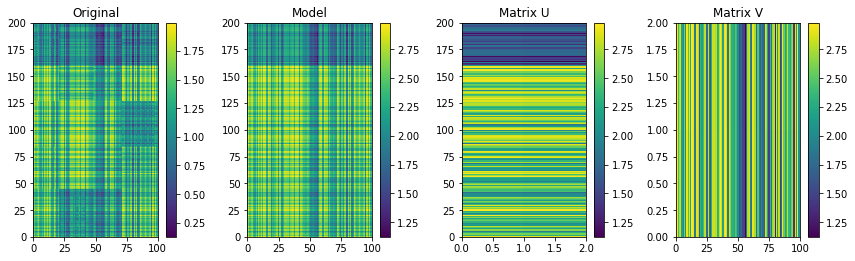

In [9]:
res_sc0 = scaled_ninf(NINF = -1)
mean_median(res_sc0[0], res_sc0[1], res_sc0[2])
ut.plot_original_model_U_V(X_original, res_sc0[3], res_sc0[4][0], res_sc0[4][1])

scaled matrix, minimum: 1.9797487246811358, maximum: 1.99680925789654
mean: 0.4564071777261695, median: 0.4564071777261695, best: 0.912814355452339


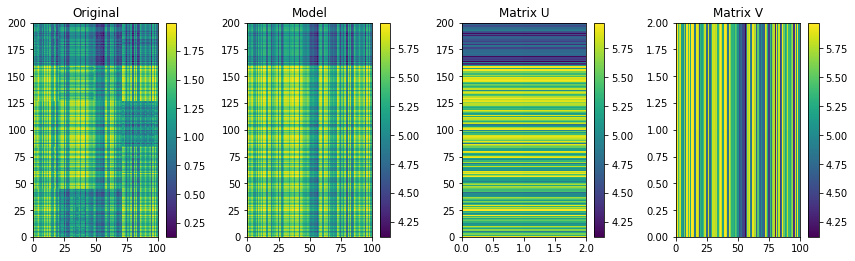

In [10]:
res_sc1 = scaled_ninf(NINF = 0)
mean_median(res_sc1[0], res_sc1[1], res_sc1[2])
ut.plot_original_model_U_V(X_original, res_sc1[3], res_sc1[4][0], res_sc1[4][1])

scaled matrix, minimum: 0.23413658410677962, maximum: 0.25119711732218375
mean: 0.4564071777261695, median: 0.4564071777261695, best: 0.912814355452339


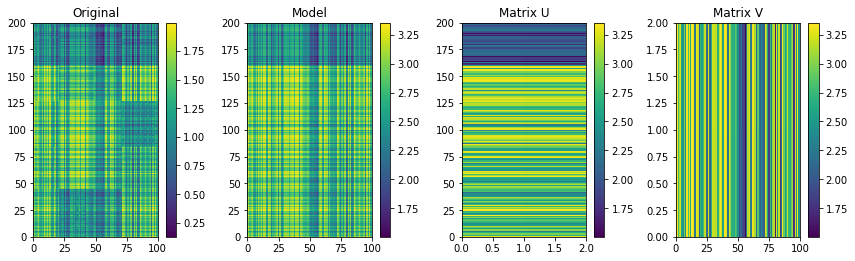

In [11]:
res_sc2 = scaled_ninf(NINF = minX - 1)  # same as minX?
mean_median(res_sc2[0], res_sc2[1], res_sc2[2])
ut.plot_original_model_U_V(X_original, res_sc2[3], res_sc2[4][0], res_sc2[4][1])

scaled matrix, minimum: 2.2341365841067797, maximum: 2.251197117322184
mean: 0.4564071781108788, median: 0.4564071777261696, best: 0.912814359299431


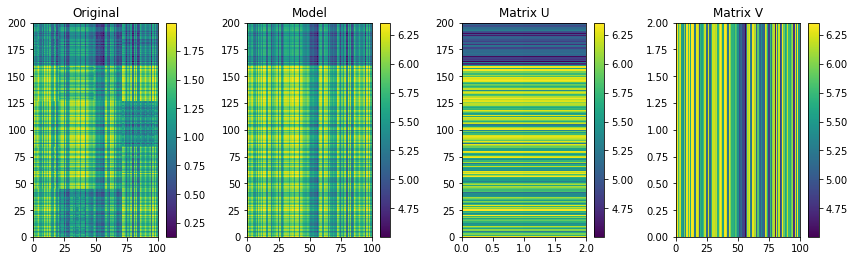

In [12]:
res_sc3 = scaled_ninf(NINF = minX)  # best, why?
mean_median(res_sc3[0], res_sc3[1], res_sc3[2])
ut.plot_original_model_U_V(X_original, res_sc3[3], res_sc3[4][0], res_sc3[4][1])

scaled matrix, minimum: 4.23413658410678, maximum: 4.251197117322183
mean: 0.4563916627451252, median: 0.4563916627451252, best: 0.9127833254902504


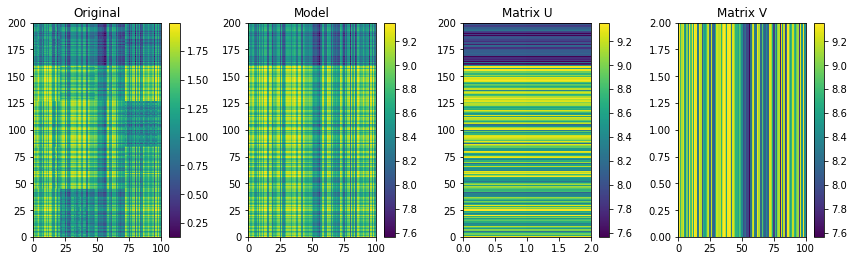

In [13]:
res_sc4 = scaled_ninf(NINF = minX + 1)  
mean_median(res_sc4[0], res_sc4[1], res_sc4[2])
ut.plot_original_model_U_V(X_original, res_sc4[3], res_sc4[4][0], res_sc4[4][1])

scaled matrix, minimum: 22.23413658410678, maximum: 22.251197117322185
mean: 0.0, median: 0.0, best: 0.0


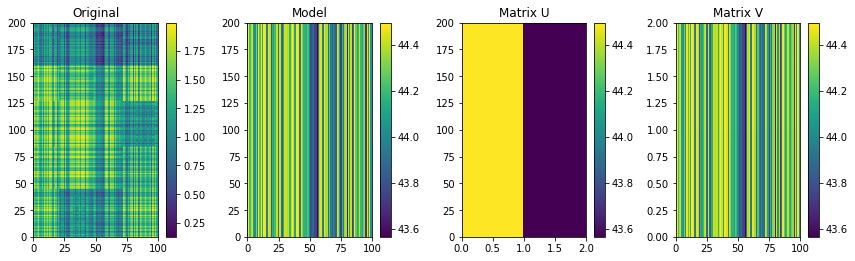

In [14]:
res_sc5 = scaled_ninf(NINF = minX + 10)
mean_median(res_sc5[0], res_sc5[1], res_sc5[2])
ut.plot_original_model_U_V(X_original, res_sc5[3], res_sc5[4][0], res_sc5[4][1])

scaled matrix, minimum: 1.725360865255492, maximum: 1.742421398470896
mean: 0.4564071777261695, median: 0.4564071777261695, best: 0.912814355452339


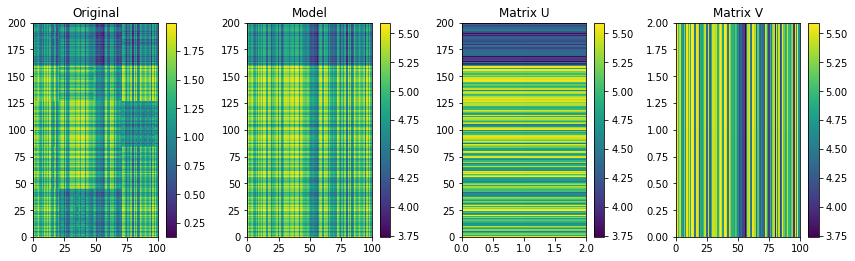

In [15]:
res_sc6 = scaled_ninf(NINF =  - minX)  # same as minX?
mean_median(res_sc6[0], res_sc6[1], res_sc6[2])
ut.plot_original_model_U_V(X_original, res_sc6[3], res_sc6[4][0], res_sc6[4][1])

scaled matrix, minimum: 5.973367240474216, maximum: 5.990427773689619
mean: 0.0, median: 0.0, best: 0.0


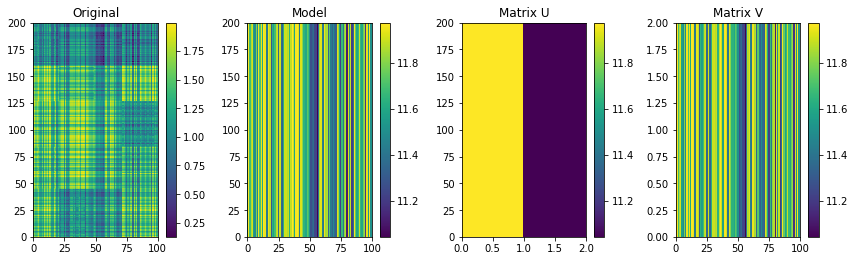

In [16]:
res_sc7 = scaled_ninf(NINF = maxX)
mean_median(res_sc7[0], res_sc7[1], res_sc7[2])
ut.plot_original_model_U_V(X_original, res_sc7[3], res_sc7[4][0], res_sc7[4][1])

scaled matrix, minimum: -0.012069520852156401, maximum: 0.0
mean: 0.9129034569959958, median: 0.9129577458919693, best: 0.9144481472182451


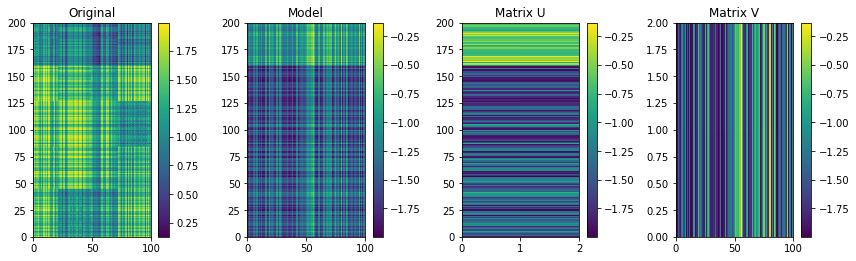

In [17]:
res_sc8 = scaled_ninf(NINF = - maxX)  # also good
mean_median(res_sc8[0], res_sc8[1], res_sc8[2])
ut.plot_original_model_U_V(X_original, res_sc8[3], res_sc8[4][0], res_sc8[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9234574157065893, median: 0.9125151217151419, best: 0.9865514881508496


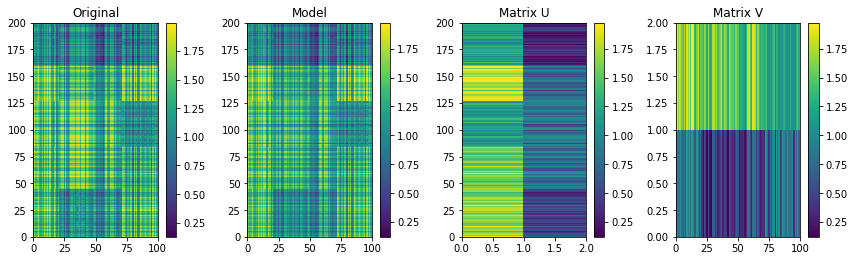

In [18]:
res_sc9 = scaled_ninf(NINF = -10)
mean_median(res_sc9[0], res_sc9[1], res_sc9[2])
ut.plot_original_model_U_V(X_original, res_sc9[3], res_sc9[4][0], res_sc9[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9398503466847283, median: 0.9304373778249686, best: 0.9869552198371955


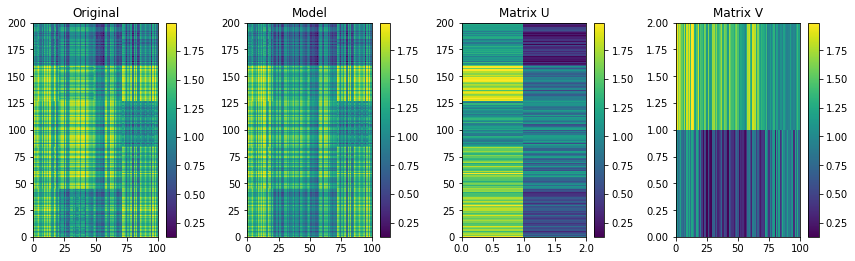

In [19]:
res_sc10 = scaled_ninf(NINF = -100)
mean_median(res_sc10[0], res_sc10[1], res_sc10[2])
ut.plot_original_model_U_V(X_original, res_sc10[3], res_sc10[4][0], res_sc10[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9350440460491029, median: 0.9313167301008363, best: 0.9814143951253114


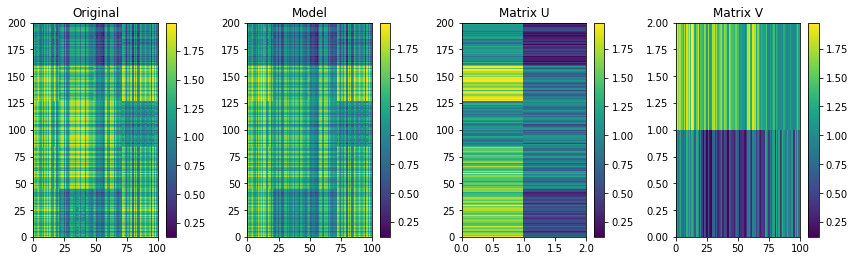

In [20]:
res_sc11 = scaled_ninf(NINF = -1000)
mean_median(res_sc11[0], res_sc11[1], res_sc11[2])
ut.plot_original_model_U_V(X_original, res_sc11[3], res_sc11[4][0], res_sc11[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9352260088479918, median: 0.9257518593523153, best: 0.9963731342338485


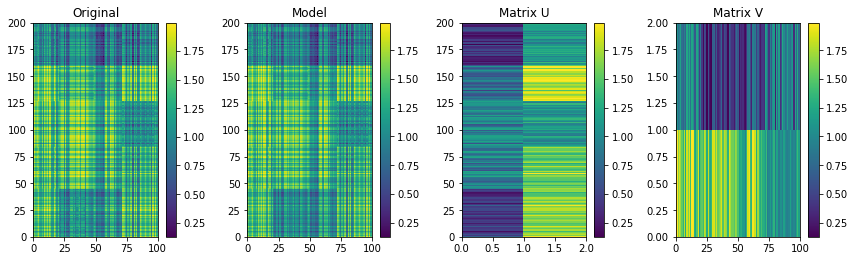

In [21]:
res_sc12 = scaled_ninf(NINF = -10000)
mean_median(res_sc12[0], res_sc12[1], res_sc12[2])
ut.plot_original_model_U_V(X_original, res_sc12[3], res_sc12[4][0], res_sc12[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9321326912183643, median: 0.9293322837824136, best: 0.9957649244182316


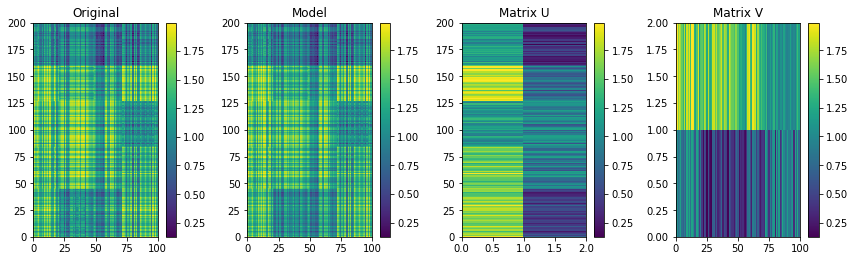

In [22]:
res_sc13 = scaled_ninf(NINF = -100000)
mean_median(res_sc13[0], res_sc13[1], res_sc13[2])
ut.plot_original_model_U_V(X_original, res_sc13[3], res_sc13[4][0], res_sc13[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.9430662944954978, median: 0.9378611268468096, best: 0.9902254256660648


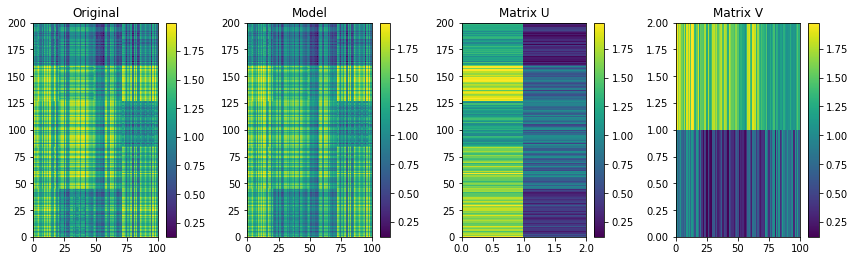

In [23]:
res_sc14 = scaled_ninf(NINF = -1000000)
mean_median(res_sc14[0], res_sc14[1], res_sc14[2])
ut.plot_original_model_U_V(X_original, res_sc14[3], res_sc14[4][0], res_sc14[4][1])

scaled matrix, minimum: -0.9292395569977715, maximum: 0.0
mean: 0.933796592332753, median: 0.9308913538935009, best: 0.9732287583156379


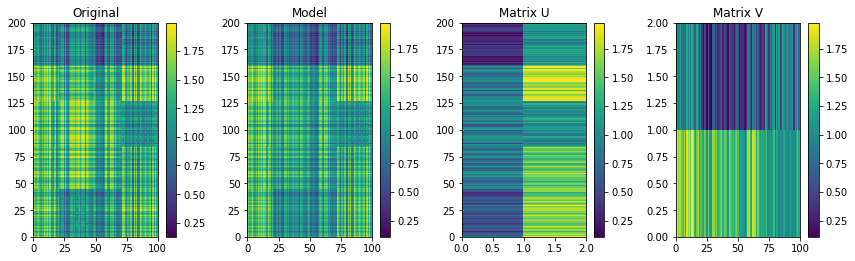

In [24]:
res_sc15 = scaled_ninf(NINF = -10000000)
mean_median(res_sc15[0], res_sc15[1], res_sc15[2])
ut.plot_original_model_U_V(X_original, res_sc15[3], res_sc15[4][0], res_sc15[4][1])